In [100]:
import matplotlib.pyplot as pyplot
from cmath import pi, exp, phase, sin, cos, tan, sqrt

In [3]:
def z(w):
    return exp(w*1j)

def analyze_transfer_function(transfer_function, steps=100):
    frequencies = [pi * i / steps for i in range(steps)]
    magnitudes = [abs(transfer_function(w)) for w in frequencies]
    phases = [phase(transfer_function(w)) for w in frequencies]
    return frequencies, magnitudes, phases

In [4]:
def plot_filter(frequencies, magnitudes, phases):
    figure = pyplot.figure(figsize=(20,12))
    
    ticks = [0, pi / 4, pi / 2, 3 * pi / 4, pi, 5 * pi / 4, 3 * pi / 2, 7 * pi / 4]
    tick_labels = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$', r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$']
    
    mag_linear = figure.add_subplot(2,2,1)
    mag_linear.plot(frequencies, magnitudes)
    mag_linear.set_yscale('log')
    mag_linear.set_title("Magnitude Response")
    mag_linear.set_xticks(ticks[0:5])
    mag_linear.set_xticklabels(tick_labels[0:5])
    
    phase_linear = figure.add_subplot(2,2,2)
    phase_linear.plot(frequencies, phases)
    phase_linear.set_title("Phase Response")
    phase_linear.set_xticks(ticks[0:5])
    phase_linear.set_xticklabels(tick_labels[0:5])

    mag_polar = figure.add_subplot(2, 2, 3, projection="polar")
    mag_polar.plot(frequencies, magnitudes)
    mag_polar.set_xticks(ticks)
    mag_polar.set_xticklabels(tick_labels)
    
    phase_polar = figure.add_subplot(2, 2, 4, projection="polar")
    phase_polar.plot(frequencies, phases)
    phase_polar.set_xticks(ticks)
    phase_polar.set_xticklabels(tick_labels)

In [136]:
def biquad(a0, a1, a2, b1, b2, w):
    alpha1 = a1 / a0
    alpha2 = a2 / a0
    return a0 * ((1 + alpha1 * z(w)**-1 + alpha2 * z(w)**-2) / (1 + b1 * z(w)**-1 + b2 * z(w)**-2))

def lpf(w):
    Q = 10
    fs = 48000
    cutoff = 4000
    theta = 2 * pi * cutoff / fs
    d = 1 / Q
    beta = 0.5 * (1 - (d/2) * sin(theta)) / (1 + (d/2) * sin(theta))
    gamma = (0.5 + beta) * cos(theta)
    a0 = (0.5 + beta - gamma) / 2
    a1 = 0.5 + beta - gamma
    a2 = (0.5 + beta - gamma) / 2
    b1 = -2 * gamma
    b2 = 2 * beta
    return biquad(a0, a1, a2, b1, b2, w)

def smith_angell(w):
    q = 10
    fs = 48000
    cutoff = 4000
    theta = 2 * pi * cutoff / fs
    bw = cutoff / q
    b2 = exp(-2 * pi * bw / fs)
    b1 = (-4 * b2 / (1 + b2)) * cos(theta)
    a0 = 1 - sqrt(b2)
    a1 = 0
    a2 = -a0
    return biquad(a0, a1, a2, b1, b2, w)

def hpf(w):
    cutoff = 4000
    fs = 48000
    Q = 10
    theta = 2 * pi * cutoff / fs
    d = 1 / Q
    beta = 0.5 * (1 - (d/2) * sin(theta)) / (1 + (d/2) * sin(theta))
    gamma = (0.5 + beta) * cos(theta)
    a0 = (0.5 + beta + gamma) / 2
    a1 = -1 * (0.5 + beta + gamma)
    a2 = a0
    b1 = -2 * gamma
    b2 = 2 * beta
    return biquad(a0, a1, a2, b1, b2, w)

def bpf(w):
    cutoff = 10000
    fs = 48000
    K = tan(pi * cutoff / fs)
    Q = 5
    s = K**2 * Q + K + Q
    a0 = K / s
    a1 = 0
    a2 = -1 * K / s
    b1 = (2 * Q * (K**2 - 1)) / s
    b2 = (K**2 * Q - K + Q) / s
    return biquad(a0, a1, a2, b1, b2, w)

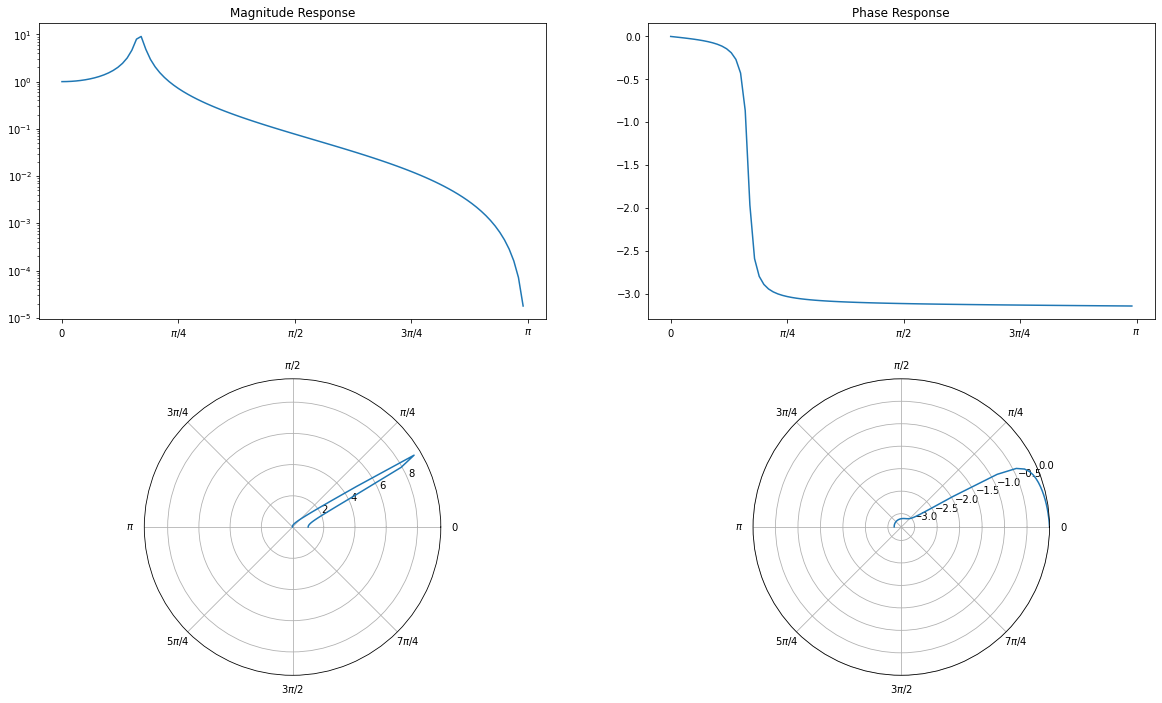

In [129]:
plot_filter(*analyze_transfer_function(lpf))

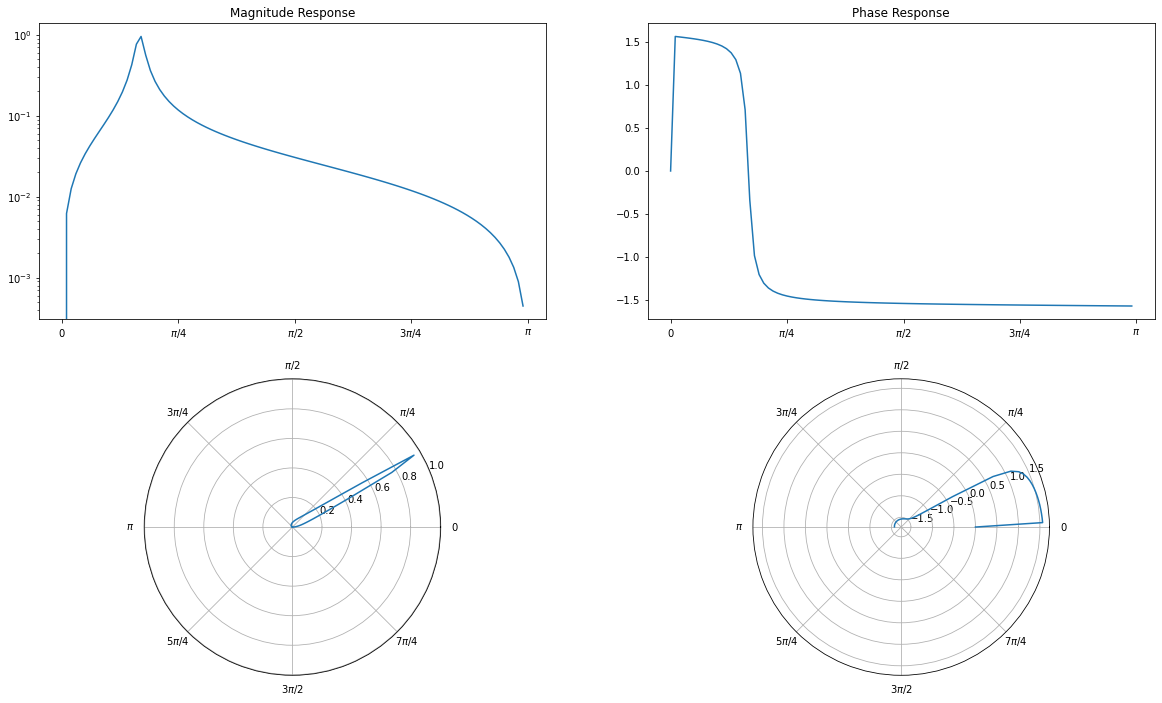

In [130]:
plot_filter(*analyze_transfer_function(smith_angell))

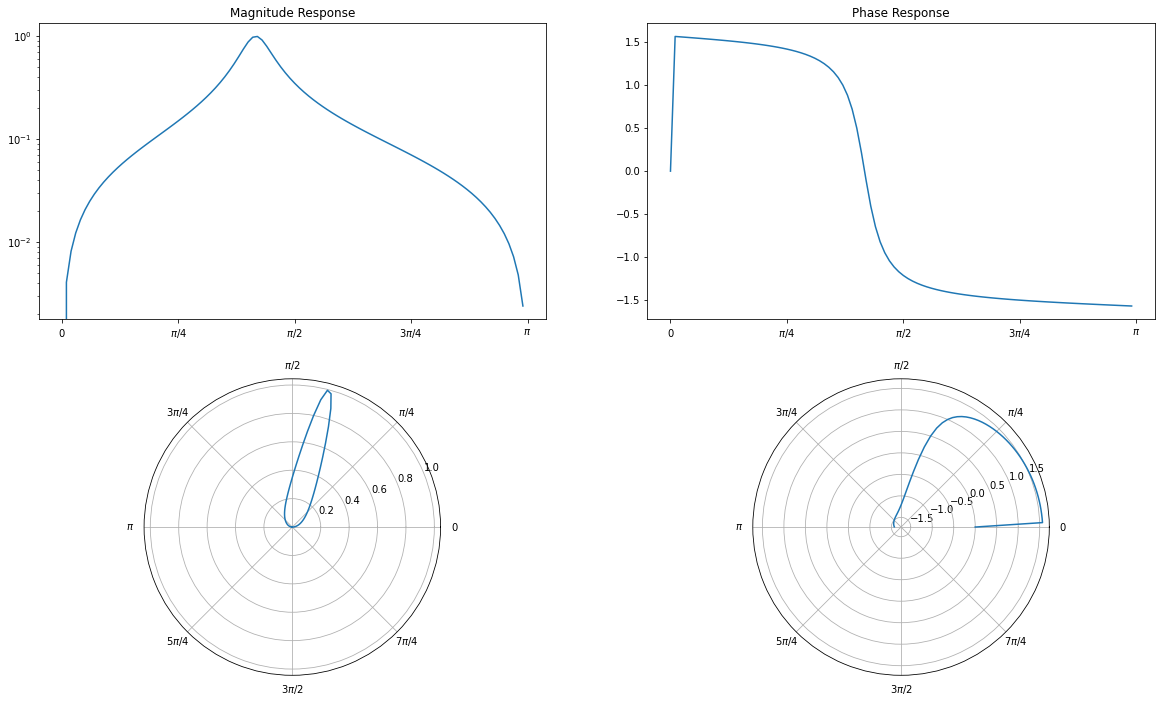

In [131]:
plot_filter(*analyze_transfer_function(bpf))

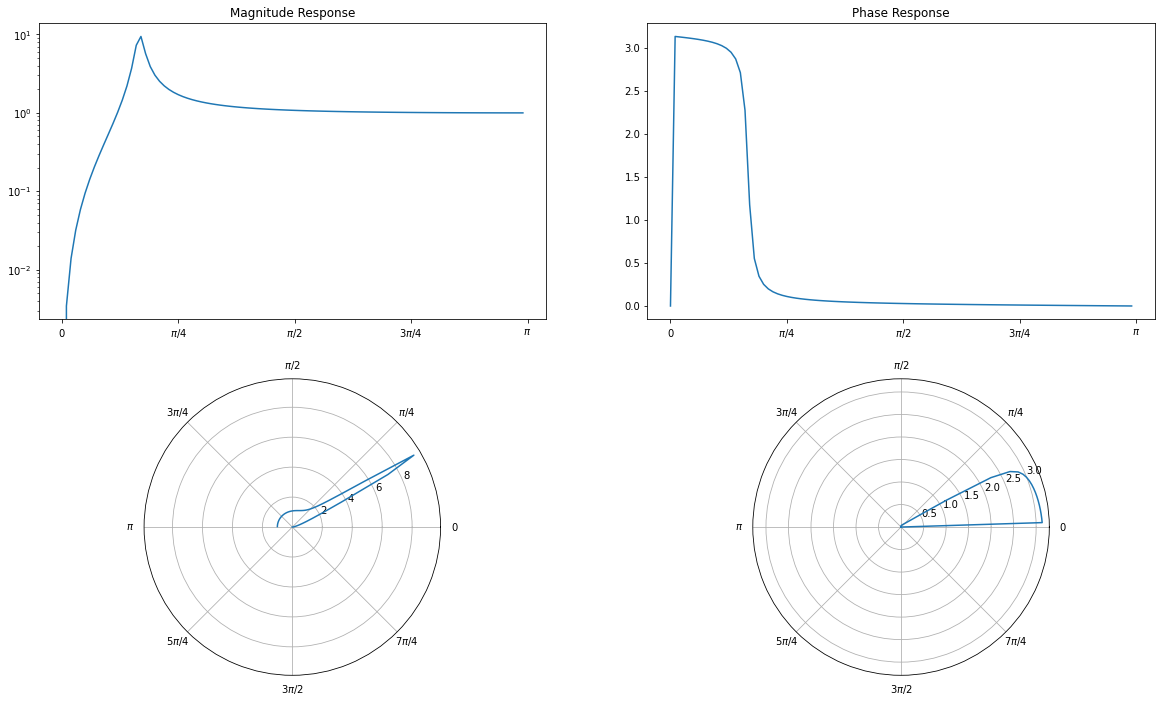

In [137]:
plot_filter(*analyze_transfer_function(hpf))